In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data = pd.read_csv('benchmark/results.csv')
small_data = data[data['Model']=='small_lstm']
medium_data = data[data['Model']=='medium_cnn']
large_data = data[data['Model']=='large_tcnn']
data

,Timestamp,GPU,# of GPUs,Server,Concurrency,Model,# of Requests,BatchSize,Theta (inf/s)
0,14:11:39.058206,V100-SXM2-32GB,1,1,1,small_lstm,1024,1,85.226012
1,14:11:56.818484,V100-SXM2-32GB,1,1,2,small_lstm,1024,1,100.863204
2,14:12:17.374209,V100-SXM2-32GB,1,1,4,small_lstm,1024,1,150.539521
3,14:12:38.604159,V100-SXM2-32GB,1,1,1,small_lstm,1024,2,225.155358
4,14:12:52.728752,V100-SXM2-32GB,1,1,2,small_lstm,1024,2,204.891967
...,...,...,...,...,...,...,...,...,...
67,14:29:49.592248,V100-SXM2-32GB,1,1,2,large_tcnn,1024,64,24748.101319
68,14:29:54.894747,V100-SXM2-32GB,1,1,4,large_tcnn,1024,64,24294.868929
69,14:30:05.679571,V100-SXM2-32GB,1,1,1,large_tcnn,1024,128,35224.706733
70,14:30:09.405757,V100-SXM2-32GB,1,1,2,large_tcnn,1024,128,38150.652427


In [3]:
from cloudmesh.common.Shell import Shell
def save_image(filename=None, dpi=300):
    # os.system("mkdir -p out")
    Shell.mkdir("out")
    plt.savefig(f"out/{filename}.png", dpi=dpi)
    plt.savefig(f"out/{filename}.svg")
    plt.savefig(f"out/{filename}.pdf")

/home/nkimball/.local/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Fig. 7.
Throughput vs. GPUs

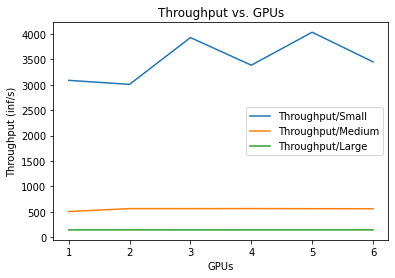

In [26]:
# fig, ax = plt.subplots()
# ax.plot(small_data['# of GPUs'], small_data['Theta (inf/s)'], label='Throughput/Small')
# ax.plot(medium_data['# of GPUs'], medium_data['Theta (inf/s)'], label='Throughput/Medium')
# ax.plot(large_data['# of GPUs'], large_data['Theta (inf/s)'], label='Throughput/Large')

# ax.set_title('Throughput vs. GPUs')
# ax.set_xlabel('GPUs')
# ax.set_ylabel('Throughput (inf/s)')

# ax.legend()

# save_image("throughput-vs-gpus")

# plt.show()

Fig #. Theta vs. Batch size

Here, we are comparing the effects of batch size on throughput. Batchsize is the number of samples per request and throughput is the number of inferences per second. Throughput is calculated according to the formula $\theta = N*B/t$ where N is the number of requests sent to the server, B is the batch size, and t is the time to inference all N requests. For the following graphs, N is held constant at 32,768 requests. The total input size is a function of N*B. The three models used for the graphs are a small lstm model, a medium tcnn model, and a large cnn model. The small model takes input data of shape (8,48) and outputs data of shape (2,12), the medium model takes input data of shape (101,82,9) and outputs data of shape (101,82), and the large model takes input data of shape (3,101,82,9) and outputs data of shape (3,101,82,1). Because we found a logarithmic relationship between the two variables, to perform regression on the data we took $log_2$ of the batch size and $log_{10}$ of the throughput, then fit a linear regression model to the data.

In [47]:
small_data_1 = small_data[small_data['Concurrency']==1]
small_data_2 = small_data[small_data['Concurrency']==2]
small_data_4 = small_data[small_data['Concurrency']==4]
medium_data_1 = medium_data[medium_data['Concurrency']==1]
medium_data_2 = medium_data[medium_data['Concurrency']==2]
medium_data_4 = medium_data[medium_data['Concurrency']==4]
large_data_1 = large_data[large_data['Concurrency']==1]
large_data_2 = large_data[large_data['Concurrency']==2]
large_data_4 = large_data[large_data['Concurrency']==4]

s1_reg = np.polyfit(np.log2(small_data_1['BatchSize']), np.log10(small_data_1['Theta (inf/s)']), 1)
s2_reg = np.polyfit(np.log2(small_data_2['BatchSize']), np.log10(small_data_2['Theta (inf/s)']), 1)
s3_reg = np.polyfit(np.log2(small_data_4['BatchSize']), np.log10(small_data_4['Theta (inf/s)']), 1)
m1_reg = np.polyfit(np.log2(medium_data_1['BatchSize']), np.log10(medium_data_1['Theta (inf/s)']), 1)
m2_reg = np.polyfit(np.log2(medium_data_2['BatchSize']), np.log10(medium_data_2['Theta (inf/s)']), 1)
m4_reg = np.polyfit(np.log2(medium_data_4['BatchSize']), np.log10(medium_data_4['Theta (inf/s)']), 1)
l1_reg = np.polyfit(np.log2(large_data_1['BatchSize']), np.log10(large_data_1['Theta (inf/s)']), 1)
l2_reg = np.polyfit(np.log2(large_data_2['BatchSize']), np.log10(large_data_2['Theta (inf/s)']), 1)
l4_reg = np.polyfit(np.log2(large_data_4['BatchSize']), np.log10(large_data_4['Theta (inf/s)']), 1)

def formula(regression):
    return f"Θ=10^({regression[0]:.2f}log\u2082(b)+{regression[1]:.2f})"

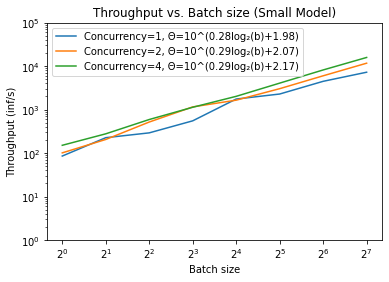

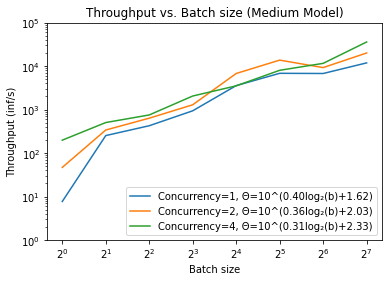

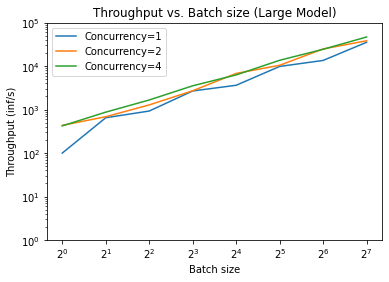

In [49]:

fig, ax = plt.subplots()
ax.plot(small_data_1['BatchSize'], small_data_1['Theta (inf/s)'], label=f'Concurrency=1, Θ=10^({s1_reg[0]:.2f}log\u2082(b)+{s1_reg[1]:.2f})')
ax.plot(small_data_2['BatchSize'], small_data_2['Theta (inf/s)'], label=f'Concurrency=2, Θ=10^({s2_reg[0]:.2f}log\u2082(b)+{s2_reg[1]:.2f})')
ax.plot(small_data_4['BatchSize'], small_data_4['Theta (inf/s)'], label=f'Concurrency=4, Θ=10^({s3_reg[0]:.2f}log\u2082(b)+{s3_reg[1]:.2f})')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])

ax.set_title('Throughput vs. Batch size (Small Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')

ax.legend()

save_image("throughput-vs-batch-size(small-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(medium_data_1['BatchSize'], medium_data_1['Theta (inf/s)'], label='Concurrency=1, ' + formula(m1_reg))
ax.plot(medium_data_2['BatchSize'], medium_data_2['Theta (inf/s)'], label='Concurrency=2, ' + formula(m2_reg))
ax.plot(medium_data_4['BatchSize'], medium_data_4['Theta (inf/s)'], label='Concurrency=4, ' + formula(m4_reg))
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])

ax.set_title('Throughput vs. Batch size (Medium Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')

ax.legend()

save_image("throughput-vs-batch-size(medium-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(large_data_1['BatchSize'], large_data_1['Theta (inf/s)'], label='Concurrency=1')
ax.plot(large_data_2['BatchSize'], large_data_2['Theta (inf/s)'], label='Concurrency=2')
ax.plot(large_data_4['BatchSize'], large_data_4['Theta (inf/s)'], label='Concurrency=4')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])

ax.set_title('Throughput vs. Batch size (Large Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')

ax.legend()

save_image("throughput-vs-batch-size(large-model)")

plt.show()

Throughput vs. Batchsize

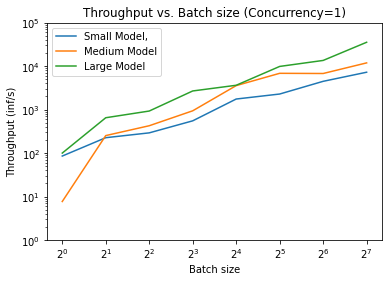

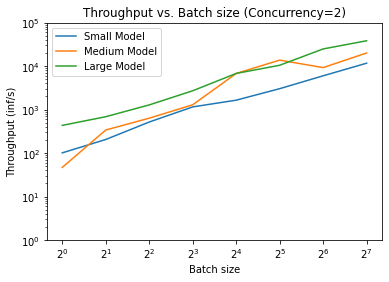

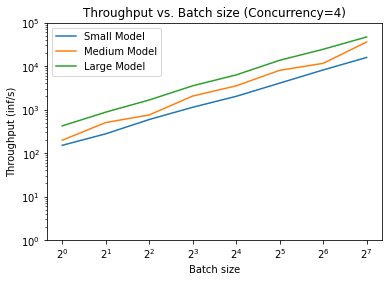

In [50]:
fig, ax = plt.subplots()
ax.plot(small_data_1['BatchSize'], small_data_1['Theta (inf/s)'], label='Small Model, ')
ax.plot(medium_data_1['BatchSize'], medium_data_1['Theta (inf/s)'], label='Medium Model')
ax.plot(large_data_1['BatchSize'], large_data_1['Theta (inf/s)'], label='Large Model')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])

ax.set_title('Throughput vs. Batch size (Concurrency=1)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')
ax.legend()

save_image("throughput-vs-batch-size(concurrency=1)")

plt.show()

fig, ax = plt.subplots()
ax.plot(small_data_2['BatchSize'], small_data_2['Theta (inf/s)'], label='Small Model')
ax.plot(medium_data_2['BatchSize'], medium_data_2['Theta (inf/s)'], label='Medium Model')
ax.plot(large_data_2['BatchSize'], large_data_2['Theta (inf/s)'], label='Large Model')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])

ax.set_title('Throughput vs. Batch size (Concurrency=2)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')
ax.legend()

save_image("throughput-vs-batch-size(concurrency=2)")

plt.show()

fig, ax = plt.subplots()
ax.plot(small_data_4['BatchSize'], small_data_4['Theta (inf/s)'], label='Small Model')
ax.plot(medium_data_4['BatchSize'], medium_data_4['Theta (inf/s)'], label='Medium Model')
ax.plot(large_data_4['BatchSize'], large_data_4['Theta (inf/s)'], label='Large Model')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])

ax.set_title('Throughput vs. Batch size (Concurrency=4)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')
ax.legend()

save_image("throughput-vs-batch-size(concurrency=4)")

plt.show()

Fig #. Theta vs. Concurrency

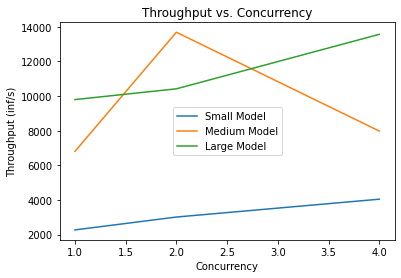

In [51]:
small_concurrency_data = small_data[small_data['BatchSize']==32]
medium_concurrency_data = medium_data[medium_data['BatchSize']==32]
large_concurrency_data = large_data[large_data['BatchSize']==32]

fig, ax = plt.subplots()
ax.plot(small_concurrency_data['Concurrency'], small_concurrency_data['Theta (inf/s)'], label='Small Model')
ax.plot(medium_concurrency_data['Concurrency'], medium_concurrency_data['Theta (inf/s)'], label='Medium Model')
ax.plot(large_concurrency_data['Concurrency'], large_concurrency_data['Theta (inf/s)'], label='Large Model')

ax.set_title('Throughput vs. Concurrency')
ax.set_xlabel('Concurrency')
ax.set_ylabel('Throughput (inf/s)')

ax.legend()

save_image("throughput-vs-concurrency")

plt.show()


# keep increasing batchsize until throughput drops
# set nrequests to 32768
# plot total time to inference 32768 inferences
# plot throughput vs batchsize for different gpus
# plot throughput vs concurrency for different gpus
# writeup: define throughput, small, medium, large, concurrency...
# run regression on graphs
# increase batchsize and find maximum throughput
# use same y-axis for all 3 graphs

create 3 new graphs, throughput/concurrency for fixed concurrency, plot each model as a line